<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada</h1>
<h2>Problemes 3 - Grafs de flux</h2>
</center>
</div>

In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Màxim flux: l'algorisme Ford-Fulkerson

Considereu el següent graf dirigit. Està format per quatre nodes $S,U,V,T$ on $S$ representa el node origen (source) i $T$ representa el node destí (target).

Quin és el màxmim flux que podem transportar de $S$ a $T$?

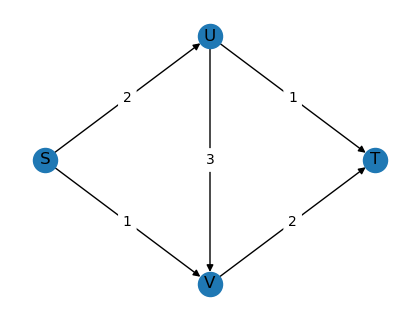

In [4]:
import networkx as nx
from matplotlib import pyplot as plt
from digraph_plot import my_draw_networkx_edge_labels

G = nx.DiGraph()
G.add_weighted_edges_from([('S','U',2), ('S','V',1), ('U', 'V', 3), ('V','T', 2), ('U','T',1)])

plt.figure(figsize=(4,3))
pos = {'S': [0,0.5], 'T':[1,0.5], 'U':[0.5, 1], 'V':[0.5,0]}
nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=nx.get_edge_attributes(G, 'weight'), rotate=False)

plt.show()

Intentem resoldre-ho per passos:
<ol>
    <li> Prenem l'aresta de major capacitat que surt de $S$. Aquesta aresta és $(S,U)$ que pot transportar 2.
    <li> Ara $U$ ha rebut 2 i pot escollir on enviar-los. Suposem que escollim enviar-los a $V$ que té la major capacitat.
    <li> Ara tenim 2 a $V$ encara que l'aresta per on hem passat podia transportar-ne més.
    <li> Finalment enviem els 2 a $T$ utilitzant l'aresta $(V,T)$.
</ol>
Ens quedaria el camí:

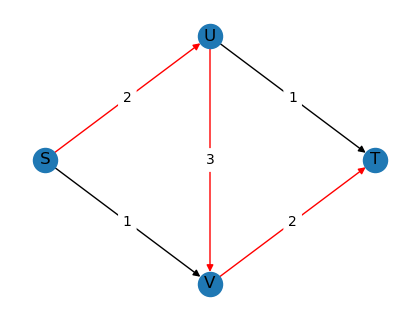

In [5]:
G = nx.DiGraph()
G.add_weighted_edges_from([('S','U',2), ('U', 'V', 3), ('V','T', 2)], color='r')
G.add_weighted_edges_from([('S','V',1), ('U','T',1)], color='k')

plt.figure(figsize=(4,3))
pos = {'S': [0,0.5], 'T':[1,0.5], 'U':[0.5, 1], 'V':[0.5,0]}
colors = [G.edges()[n]['color'] for n in G.edges()]
nx.draw(G, pos=pos, with_labels=True, edge_color=colors)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=nx.get_edge_attributes(G, 'weight'), rotate=False)

plt.show()

És el màxim flux que podem transportar? ...Doncs NO!

Donat el camí anterior, podem construïr el __graf residual__. El graf residual ens permet saber el flux que hem gastat al transportar i quant ens en queda a les diferents arestes.

El graf residual per al camí anterior és:

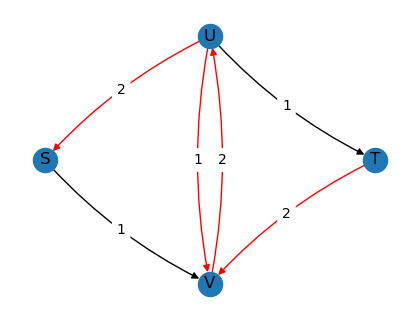

In [6]:
G = nx.DiGraph()
G.add_weighted_edges_from([('U','S',2), ('V', 'U', 2), ('T','V', 2), ('U','V',1)], color='r')
G.add_weighted_edges_from([('S','V',1), ('U','T',1)], color='k')

plt.figure(figsize=(4,3))
pos = {'S': [0,0.5], 'T':[1,0.5], 'U':[0.5, 1], 'V':[0.5,0]}
colors = [G.edges()[n]['color'] for n in G.edges()]
nx.draw(G, pos=pos, with_labels=True, edge_color=colors,connectionstyle='arc3, rad = 0.1')
my_draw_networkx_edge_labels(G, pos=pos, edge_labels=nx.get_edge_attributes(G, 'weight'), rad=0.1, rotate=False)

plt.show()

Observeu que hem 'girat' les arestes que transporten el maxim de la seva capacitat. Com que l'aresta $(U,V)$ transporta 2 tot i que pot transportar 3, mantenim 1 en la direcció original.

Tornem a buscar un camí de $S$ a $T$ sobre aquest graf residual. Observeu que n'existeix un que transporta flux 1 seguint el camí $S$, $V$, $U$, $T$.

Però com podem anar de $V$ a $U$ si en el graf original només podíem anar de $U$ a $V$? No és que poguem anar de $V$ a $U$ sino que, com que ho estem mirant en el graf residual, ens indica que per aquest camí ha de 'deixar de passar-hi' 1 unitat de flux. I això només es possible si, dels 2 que havíem rebut a $U$ n'enviem un directament a $T$ i l'altre l'enviem a $V$.

Així, el màxim de flux que podem transportar és 3:
- Enviem 2 unitats de $S$ a $U$.
    - 1 unitat l'enviem directament a $T$.
    - 1 unitat l'enviem a $V$.
    
- Enviem 1 unitat de S a $V$.
    - Recollim la unitat que venia de $U$ i n'enviem 2 a $T$.

<div class="alert alert-success">
<h1>Problema 1</h1>
<p>
    Repetiu manualment el procediment anterior amb el següent graf:<br><br>
</p>    
        
</div>

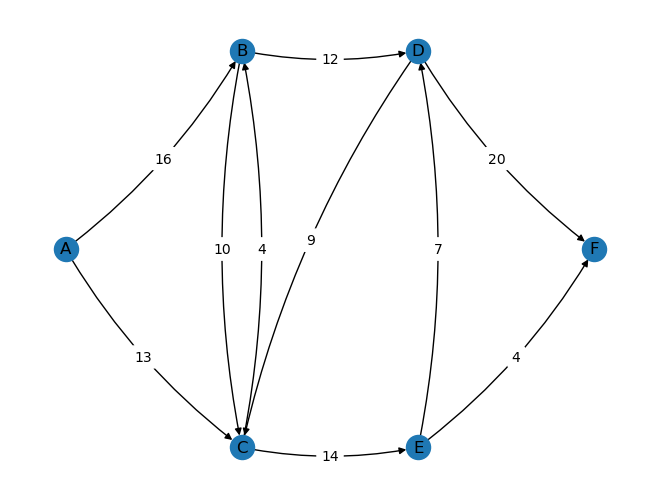

In [7]:
G = nx.DiGraph()
G.add_weighted_edges_from([("A","B",16),("A","C",13),("B","C",10),("C","B",4),("B","D",12),
                           ("C","E",14),("D","C",9),("E","D",7),("D","F",20),("E","F",4)])

pos = {"A": [0,0.5], "B":[0.25,1], "C":[0.25, 0], "D":[0.5,1], "E":[0.5,0], "F":[0.75,0.5]}
nx.draw(G, pos=pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
my_draw_networkx_edge_labels(G, pos=pos, edge_labels=nx.get_edge_attributes(G, 'weight'), rad=0.1, rotate=False)

plt.show()

<div class="alert alert-success">
<h1>Problema 2</h1>
<p>
    Implementeu l'algorisme Ford-Fulkerson. Donat un graf dirigit sense cicles, l'algorisme ha de retornar el màxim flux que es pot transportar des del node 'source' fins al node 'target'. Podeu seguir l'esquema següent:
    <ol>
        <li> Inicialitzem el màxim flux que podem transportar            
        <li> Busquem un camí del node orígen al node destí. Podeu usar DFS o BFS. Si no existeix cap camí, l'algorisme acaba.
        <li> Augmentem el màxim flux transportat amb el valor mínim del camí que hem trobat.
        <li> Actualitzem els pesos i/o creem arestes per construïr el graf residual.
        <li> Tornem al punt 2.
    </ol>
</p>    
        
</div>

In [8]:
def dfs_path(G, source, target, visited):
    """
    Aquesta funció construeix el camí de source a target usant DFS.
    En cas que no existeixi, retornarà False.
    """
    
    # Si source és target, el camí serà simplement aquest node
    if source==target:
        return [target]
    
    # Si encara no hem visitat el node source, el visitem i seguim amb el DFS
    if source not in visited:
        visited.add(source)
        for nei in G.neighbors(source):
            
            # Comprovem que el pes de l'aresta sigui major que zero.
            # En el graf residual tindrem arestes 0 quan 'gastem' les unitats de flux
            if G.edges()[(source,nei)]['weight'] > 0:
                pth = dfs_path(G, nei, target, visited)
                
                # Fent aquesta crida recursiva, anirem construïnt tot el path des de l'orígen fins al destí.
                if pth:
                    return [source] + pth
                
    return False
    

def ford_fulkerson(G, source='S', target='T'):
    """
    Implementació de l'algorisme ford-fulkerson
    """
    
    # Punt 1. Guardem el màxim flux que podem transportar. Inicialment és zero
    maxflow = 0
    
    # OPCIONAL: Guardarem totes les iteracions de l'algorisme per veure com evoluciona el graf.
    graph_states = [G.copy()]
    
    # Comencem aplicant un DFS, construïnt el path
    pth = dfs_path(G, source, target, set())
    
    # Punt 2. Si existeix el path
    while pth:
        
        # Punt 3. Trobem l'aresta de pes mínim dins el camí i actualitzem el flux màxim
        minflow = min([G.edges()[(pth[i], pth[i+1])]['weight'] for i in range(len(pth)-1)])
        maxflow += minflow
        
        # Punt 4. Actualitzem el valor de les arestes
        for i in range(len(pth)-1):
            
            # L'aresta (i, i+1) sempre existeix ja que forma part del path
            G.edges()[(pth[i], pth[i+1])]['weight'] -= minflow
            
            # L'aresta (i+1, i) pot no existir ja que va en sentit contrari
            if (pth[i+1], pth[i]) not in G.edges():
                G.add_weighted_edges_from([(pth[i+1], pth[i], 0)])                    
            G.edges()[(pth[i+1], pth[i])]['weight'] += minflow
                
        graph_states.append(G.copy())      
        
        # Punt 5. Tornem al Punt 2 mentre existeixi camí de l'orígen al destí.
        pth = dfs_path(G, source, target, set())
    return maxflow, graph_states

Prova el teu algorisme:

In [9]:
G = nx.DiGraph()
G.add_weighted_edges_from([('S','U',2), ('S','V',1), ('U', 'V', 3), ('V','T', 2), ('U','T',1)])

maxflow, graph_states = ford_fulkerson(G)

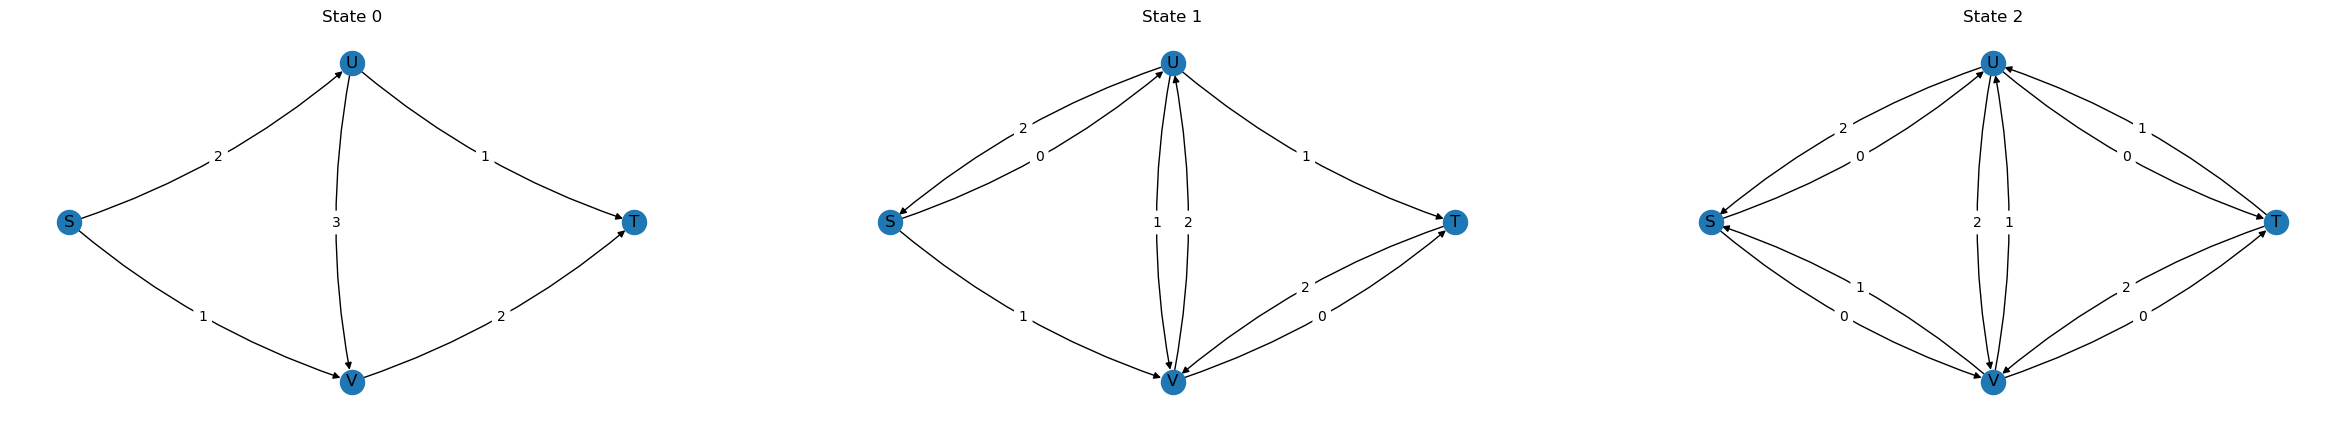

In [10]:
fig, axs = plt.subplots(1, len(graph_states), figsize=(30,5))
pos = {'S': [0,0.5], 'T':[1,0.5], 'U':[0.5, 1], 'V':[0.5,0]}

for idx, graph in enumerate(graph_states):
    nx.draw(graph, pos=pos, with_labels=True, connectionstyle='arc3, rad = 0.1', ax=axs[idx])
    my_draw_networkx_edge_labels(graph, pos=pos, edge_labels=nx.get_edge_attributes(graph, 'weight'),rad=0.1, rotate=False, ax=axs[idx])
    axs[idx].set_title(f'State {idx}')
plt.show()

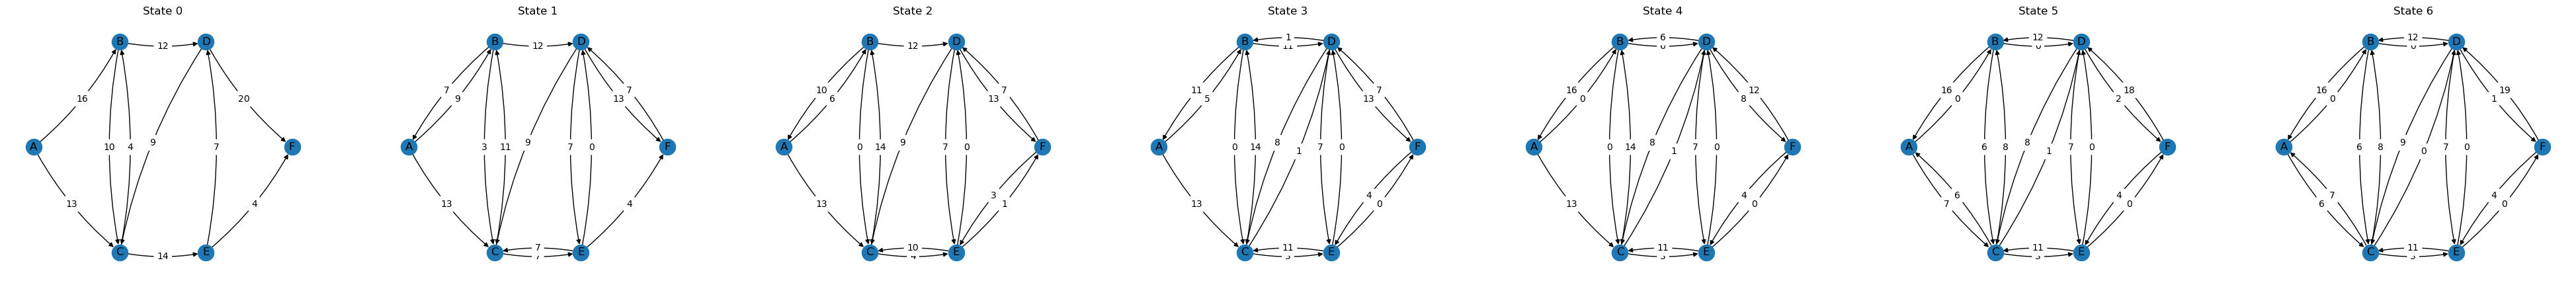

In [11]:
G = nx.DiGraph()
G.add_weighted_edges_from([("A","B",16),("A","C",13),("B","C",10),("C","B",4),("B","D",12),
                           ("C","E",14),("D","C",9),("E","D",7),("D","F",20),("E","F",4)])

pos = {"A": [0,0.5], "B":[0.25,1], "C":[0.25, 0], "D":[0.5,1], "E":[0.5,0], "F":[0.75,0.5]}
maxflow, graph_states = ford_fulkerson(G, source='A', target='F')

fig, axs = plt.subplots(1, len(graph_states), figsize=(50,5))
for idx, graph in enumerate(graph_states):
    nx.draw(graph, pos=pos, with_labels=True, connectionstyle='arc3, rad = 0.1', ax=axs[idx])
    my_draw_networkx_edge_labels(graph, pos=pos, edge_labels=nx.get_edge_attributes(graph, 'weight'),rad=0.1, rotate=False, ax=axs[idx])
    axs[idx].set_title(f'State {idx}')
plt.show()

In [14]:
def dfs_explore(G,resid,node,visited):
    pass


def mincut(G, source='S', target='T'):
    sortida = ford_fulkerson(G, source, target)
    graph_final = sortida[1][-1]
    
    
    
    print(f'Nodes grup source:')
    print(f'Nodes grup target:')
    print(f'MinCut = MaxFlow =')
    print(f'Arestes mincut:')

In [15]:
G = nx.DiGraph()
G.add_weighted_edges_from([('S','U',2), ('S','V',1), ('U', 'V', 3), ('V','T', 2), ('U','T',1)])

mincut(G)

DiGraph with 4 nodes and 10 edges
Nodes grup source:
Nodes grup target:
MinCut = MaxFlow =
Arestes mincut:
